<a href="https://colab.research.google.com/github/Johnpaul10j/my_experiment_4/blob/main/animal_sleep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Animal Sleep

Some animals, such as elephants, sleep only 3-4 hours a night, while others, like bats, can sleep up to 20 hours.

Is there a relationship between sleep duration and body mass? Is a species' diet correlated with sleep time?

The file `animal-sleep.csv` provides data on the average sleep duration of 77 animal species, along with their average body mass in kilograms.

In [1]:
# FOR GOOGLE COLAB ONLY.
# Uncomment and run the code below. A dialog will appear to upload files.
# Upload 'animal-sleep.csv' and 'linear_model.py'.

from google.colab import files
uploaded = files.upload()

Saving animal-sleep.csv to animal-sleep.csv


In [3]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

class LinearModel:
    def __init__(self, model_name=""):
        self.model_name = model_name

    def fit(self, x, y):
        x = pd.DataFrame(x)
        linear_model = LinearRegression().fit(x, y)
        y_pred = linear_model.predict(x)
        self.slope = linear_model.coef_[0]
        self.intercept = linear_model.intercept_
        self.rsquared = r2_score(y, y_pred)

    def predict(self, x):
        return self.slope * x + self.intercept

    def plot_model(self, x_min, x_max, color="black"):
        y_min = self.predict(x_min)
        y_max = self.predict(x_max)
        plt.plot([x_min, x_max], [y_min, y_max], color=color)

    def print_model_info(self):
        m = self.slope
        b = self.intercept
        rsquared = self.rsquared
        model_name = self.model_name
        print(f'LinearModel({model_name}):')
        print(f'Parameters: slope = {m:.2f}, intercept = {b:.2f}')
        print(f'Equation: y = {m:.2f}x + {b:.2f}')
        print(f'Goodness of Fit (R²): {rsquared:.3f}')


In [7]:
!pip install Linear_Model

ERROR: Could not find a version that satisfies the requirement Linear_Model (from versions: none)
ERROR: No matching distribution found for Linear_Model


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
##from linearmodel import LinearModel

df = pd.read_csv('animal-sleep.csv')
df.head()

,animal,diet,sleep,mass
0,african elephant,herbivore,3.3,6654.000
1,african giant pouched rat,omnivore,8.3,1.000
2,african striped mouse,herbivore,8.7,0.044
3,arctic fox,carnivore,12.5,3.380
4,arctic ground squirrel,omnivore,16.6,0.920


Text(0, 0.5, 'hours of sleep per day')

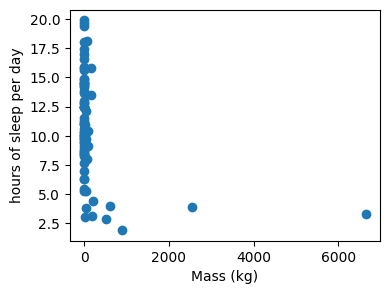

In [10]:
plt.figure(figsize=(4, 3))
plt.scatter(df['mass'], df['sleep'])
plt.xlabel('Mass (kg)')
plt.ylabel('hours of sleep per day')

We see that the mass data exhibits a strong right skew with a long tail. A log transformation can convert an exponential relationship into a linear one, making it easier to model with linear regression.

In [12]:
import math
df['log10_mass'] = df['mass'].apply(math.log10)  # apply the function to each element
df.head()

,animal,diet,sleep,mass,log10_mass
0,african elephant,herbivore,3.3,6654.000,3.823083
1,african giant pouched rat,omnivore,8.3,1.000,0.000000
2,african striped mouse,herbivore,8.7,0.044,-1.356547
3,arctic fox,carnivore,12.5,3.380,0.528917
4,arctic ground squirrel,omnivore,16.6,0.920,-0.036212


Below is code for plotting the data using the log scale.

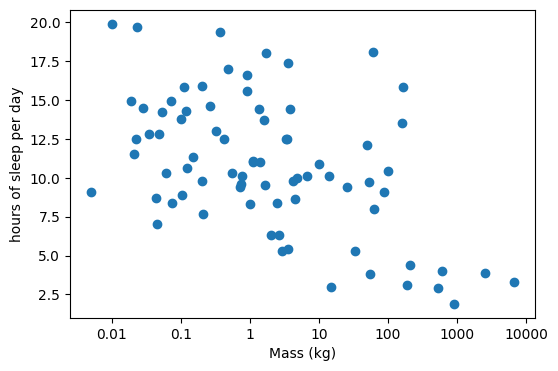

In [13]:
plt.figure(figsize=(6, 4))
plt.scatter(df['log10_mass'], df['sleep'])
plt.xlabel('Mass (kg)')
plt.ylabel('hours of sleep per day')
xticks = [-2, -1, 0, 1, 2, 3, 4]
xtick_labels = [0.01, 0.1, 1, 10, 100, 1000, 10000]
plt.xticks(xticks, xtick_labels)
plt.show()

### Project Ideas

- Model the relationship between `log10_mass` and hours of `sleep`.

- Create three separate linear models for each `diet` category: carnivores, omnivores, and herbivores.

- Visualize the data and their best-fit lines on a single plot with distinct colors and symbols for each `diet` category, or use separate plots if more suitable.

- Explore and propose mechanisms that could explain the results, potentially involving additional research.

In [ ]:
# YOUR CODE HERE (add additional cells as needed)

# Linear model API

# linear = LinearModel()
# linear.fit(x, y)
# linear.predict(x)
# linear.plot_model(x_min, x_max, color="black")
# linear.print_model_info(self):


# Task
Analyze the relationship between `log10_mass` and `sleep` for different `diet` categories (carnivores, omnivores, and herbivores) by creating separate linear models for each category, visualizing the data and models, and interpreting the results.

## Prepare data

### Subtask:
Split the data into three dataframes, one for each diet category (carnivore, omnivore, and herbivore).


**Reasoning**:
Split the dataframe into three based on the diet category.



In [14]:
carnivores_df = df[df['diet'] == 'carnivore'].copy()
omnivores_df = df[df['diet'] == 'omnivore'].copy()
herbivores_df = df[df['diet'] == 'herbivore'].copy()
display(carnivores_df.head())
display(omnivores_df.head())
display(herbivores_df.head())

,animal,diet,sleep,mass,log10_mass
3,arctic fox,carnivore,12.5,3.380,0.528917
7,big brown bat,carnivore,19.7,0.023,-1.638272
8,cheetah,carnivore,12.1,50.000,1.698970
15,desert hedgehog,carnivore,10.3,0.550,-0.259637
16,dog,carnivore,10.1,14.000,1.146128


,animal,diet,sleep,mass,log10_mass
1,african giant pouched rat,omnivore,8.3,1.000,0.000000
4,arctic ground squirrel,omnivore,16.6,0.920,-0.036212
6,baboon,omnivore,9.4,25.235,1.402003
9,chimpanzee,omnivore,9.7,52.200,1.717671
11,cotton rat,omnivore,11.3,0.148,-0.829738


,animal,diet,sleep,mass,log10_mass
0,african elephant,herbivore,3.3,6654.000,3.823083
2,african striped mouse,herbivore,8.7,0.044,-1.356547
5,asian elephant,herbivore,3.9,2547.000,3.406029
10,chinchilla,herbivore,12.5,0.420,-0.376751
12,cow,herbivore,4.0,600.000,2.778151


## Model data

### Subtask:
Create a linear model for each diet category to model the relationship between `log10_mass` and `sleep`.


**Reasoning**:
Instantiate and fit a linear model for each diet category using the `LinearModel` class.



In [15]:
carnivore_model = LinearModel(model_name="Carnivore")
carnivore_model.fit(carnivores_df['log10_mass'], carnivores_df['sleep'])

omnivore_model = LinearModel(model_name="Omnivore")
omnivore_model.fit(omnivores_df['log10_mass'], omnivores_df['sleep'])

herbivore_model = LinearModel(model_name="Herbivore")
herbivore_model.fit(herbivores_df['log10_mass'], herbivores_df['sleep'])

## Visualize results

### Subtask:
Create a scatter plot of `log10_mass` vs `sleep` for all animals, with different colors for each diet. Plot the best-fit line for each diet on the same plot.


**Reasoning**:
Create a scatter plot with different colors for each diet, add a legend, determine the range for plotting the linear models, plot the linear models for each diet, set axis labels and ticks, add a title, and display the plot.



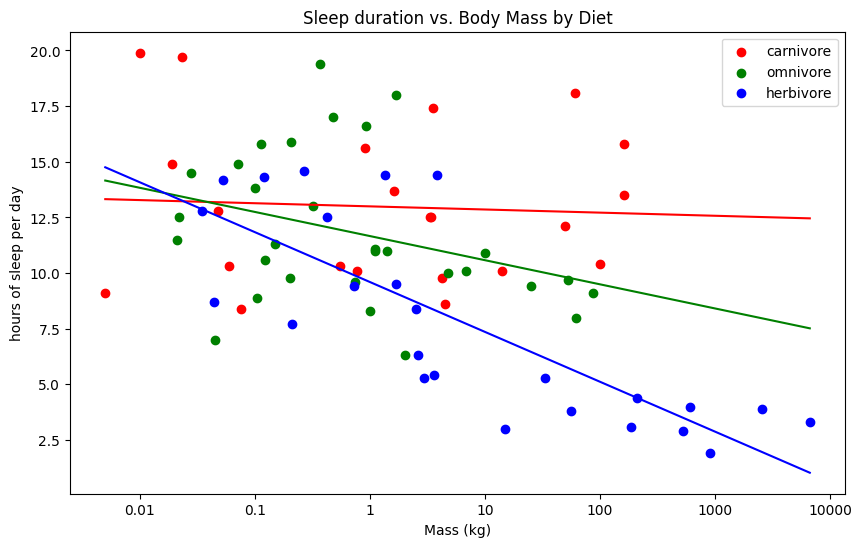

In [16]:
plt.figure(figsize=(10, 6))
colors = {'carnivore': 'red', 'omnivore': 'green', 'herbivore': 'blue'}
for diet, color in colors.items():
    subset = df[df['diet'] == diet]
    plt.scatter(subset['log10_mass'], subset['sleep'], color=color, label=diet)

plt.legend()

x_min = df['log10_mass'].min()
x_max = df['log10_mass'].max()

carnivore_model.plot_model(x_min, x_max, color='red')
omnivore_model.plot_model(x_min, x_max, color='green')
herbivore_model.plot_model(x_min, x_max, color='blue')

plt.xlabel('Mass (kg)')
plt.ylabel('hours of sleep per day')
xticks = [-2, -1, 0, 1, 2, 3, 4]
xtick_labels = [0.01, 0.1, 1, 10, 100, 1000, 10000]
plt.xticks(xticks, xtick_labels)
plt.title("Sleep duration vs. Body Mass by Diet")
plt.show()

## Interpret results

### Subtask:
Print the model information for each diet category and discuss the findings.


**Reasoning**:
Print the model information for each diet category to analyze the fitted linear models.



In [20]:
carnivore_model.print_model_info()

omnivore_model.print_model_info()

herbivore_model.print_model_info()

LinearModel(Carnivore):
Parameters: slope = -0.14, intercept = 13.00
Equation: y = -0.14x + 13.00
Goodness of Fit (R²): 0.003
LinearModel(Omnivore):
Parameters: slope = -1.08, intercept = 11.66
Equation: y = -1.08x + 11.66
Goodness of Fit (R²): 0.109
LinearModel(Herbivore):
Parameters: slope = -2.24, intercept = 9.60
Equation: y = -2.24x + 9.60
Goodness of Fit (R²): 0.626


**Reasoning**:
Analyze the printed model information and summarize the findings for each diet category.



In [18]:
print("Discussion of Findings:")
print("------------------------")

print("Carnivore Model:")
print(f"The linear model for carnivores shows a very weak negative relationship between log10_mass and sleep duration (slope = {carnivore_model.slope:.2f}). The R-squared value of {carnivore_model.rsquared:.3f} indicates that only about 0.3% of the variance in sleep duration for carnivores can be explained by their log10_mass. This suggests that mass is not a strong predictor of sleep duration for this group, and other factors likely play a more significant role.")

print("\nOmnivore Model:")
print(f"The omnivore model shows a negative relationship between log10_mass and sleep duration (slope = {omnivore_model.slope:.2f}). The R-squared value of {omnivore_model.rsquared:.3f} indicates that approximately 10.9% of the variance in sleep duration for omnivores is explained by their log10_mass. While stronger than the carnivore model, this still suggests that log10_mass is a relatively weak predictor of sleep duration for omnivores, and other factors are important.")

print("\nHerbivore Model:")
print(f"The herbivore model shows a stronger negative relationship between log10_mass and sleep duration compared to the other two groups (slope = {herbivore_model.slope:.2f}). The R-squared value of {herbivore_model.rsquared:.3f} indicates that about 62.6% of the variance in sleep duration for herbivores can be explained by their log10_mass. This suggests that for herbivores, body mass has a more substantial influence on sleep duration than for carnivores or omnivores.")

print("\nOverall Summary:")
print("Across all diet categories, there appears to be a negative trend where larger animals tend to sleep less, although the strength of this relationship varies significantly by diet. The relationship is strongest for herbivores, weaker for omnivores, and very weak for carnivores. This suggests that dietary habits may influence the relationship between body mass and sleep duration in animals.")

Discussion of Findings:
------------------------
Carnivore Model:
The linear model for carnivores shows a very weak negative relationship between log10_mass and sleep duration (slope = -0.14). The R-squared value of 0.003 indicates that only about 0.3% of the variance in sleep duration for carnivores can be explained by their log10_mass. This suggests that mass is not a strong predictor of sleep duration for this group, and other factors likely play a more significant role.

Omnivore Model:
The omnivore model shows a negative relationship between log10_mass and sleep duration (slope = -1.08). The R-squared value of 0.109 indicates that approximately 10.9% of the variance in sleep duration for omnivores is explained by their log10_mass. While stronger than the carnivore model, this still suggests that log10_mass is a relatively weak predictor of sleep duration for omnivores, and other factors are important.

Herbivore Model:
The herbivore model shows a stronger negative relationship bet

## Summary:

### Data Analysis Key Findings

*   The relationship between `log10_mass` and `sleep` duration varies significantly across different diet categories.
*   For carnivores, there is a very weak negative relationship between log10\_mass and sleep duration (slope = -0.14), with log10\_mass explaining only 0.3% of the variance in sleep duration ($R^2 = 0.003$).
*   For omnivores, there is a negative relationship between log10\_mass and sleep duration (slope = -1.08), with log10\_mass explaining approximately 10.9% of the variance ($R^2 = 0.109$).
*   For herbivores, there is a strong negative relationship between log10\_mass and sleep duration (slope = -2.24), with log10\_mass explaining about 62.6% of the variance ($R^2 = 0.626$).
*   The visual representation confirms the varying strengths of the negative relationships across the diet groups, with the herbivore trend line showing a steeper negative slope.

### Insights or Next Steps

*   Dietary habits appear to influence the degree to which body mass affects sleep duration in animals.
*   Investigate other factors that might influence sleep duration, particularly for carnivores and omnivores where mass is not a strong predictor.
